In [12]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# -------------------------------
# Load TrustReg v3 results
# -------------------------------

base = Path.cwd()
candidate = base / "outputs" / "trustreg_v3_results.csv"
if not candidate.exists():
    candidate = base.parent / "outputs" / "trustreg_v3_results.csv"

df = pd.read_csv(candidate)

print(df.columns)


Index(['question', 'source_text', 'binary_violation', 'prompt_type',
       'llm_answer', 'confidence', 'RetrievalMismatch', 'FactRisk',
       'InterpretationRisk', 'ConfidenceGap', 'GovScore', 'TrustRegDecision',
       'Harm', 'Utility', 'GovTarget', 'DomainRisk', 'ActionRisk',
       'AuthorityRisk', 'GovScore_v2', 'TrustReg_v3', 'TrustReg_v3_pred',
       'TrustReg_v3_harm', 'TrustReg_v3_utility', 'SeverityRisk',
       'ArticleRisk', 'ImpactRisk'],
      dtype='object')


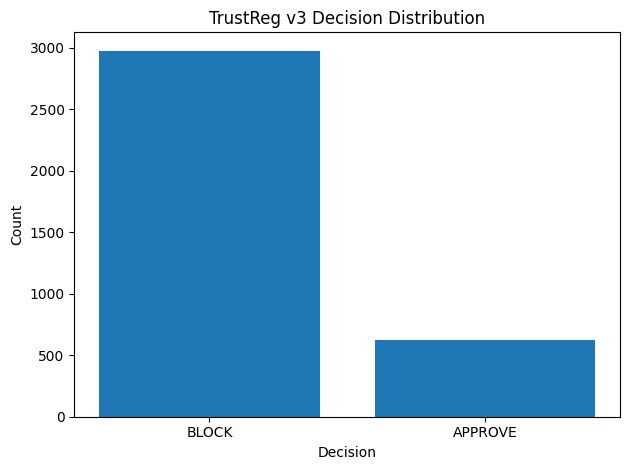

In [13]:
counts = df["TrustReg_v3"].value_counts()

plt.figure()
plt.bar(counts.index, counts.values)
plt.title("TrustReg v3 Decision Distribution")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


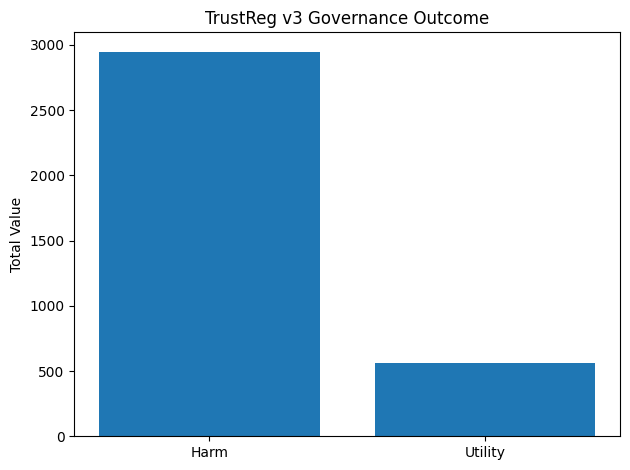

In [14]:
harm = df["TrustReg_v3_harm"].sum()
utility = df["TrustReg_v3_utility"].sum()

plt.figure()
plt.bar(["Harm","Utility"], [harm, utility])
plt.title("TrustReg v3 Governance Outcome")
plt.ylabel("Total Value")
plt.tight_layout()
plt.show()


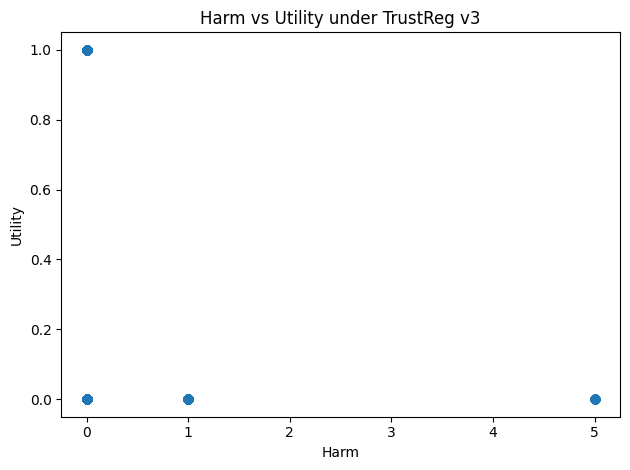

In [15]:
plt.figure()
plt.scatter(df["TrustReg_v3_harm"], df["TrustReg_v3_utility"])
plt.title("Harm vs Utility under TrustReg v3")
plt.xlabel("Harm")
plt.ylabel("Utility")
plt.tight_layout()
plt.show()


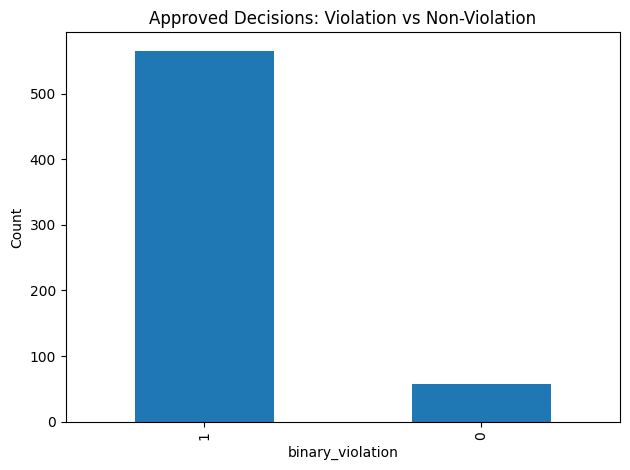

In [16]:
approved = df[df["TrustReg_v3"]=="APPROVE"]

plt.figure()
approved["binary_violation"].value_counts().plot(kind="bar")
plt.title("Approved Decisions: Violation vs Non-Violation")
plt.xlabel("binary_violation")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
